# Incidence de la varicelle

In [1]:
 %matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

###### Caractéristiques de l'installation

In [2]:
import platform
print(platform.uname())

uname_result(system='Linux', node='e38cee50978d', release='4.4.0-164-generic', version='#192-Ubuntu SMP Fri Sep 13 12:02:50 UTC 2019', machine='x86_64', processor='x86_64')


In [3]:
%%sh
pip freeze

alembic==1.3.3
asn1crypto==1.3.0
async-generator==1.10
attrs==19.3.0
backcall==0.1.0
beautifulsoup4==4.6.3
bleach==3.1.0
blinker==1.4
bokeh==0.12.16
certifi==2020.4.5.1
certipy==0.1.3
cffi==1.13.2
chardet==3.0.4
cloudpickle==0.5.6
conda==4.8.2
conda-package-handling==1.6.0
cryptography==2.5
cycler==0.10.0
Cython==0.28.5
cytoolz==0.10.1
dask==2.11.0
decorator==4.4.1
defusedxml==0.6.0
dill==0.2.9
entrypoints==0.3
fastcache==1.1.0
gmplot==1.2.0
gmpy2==2.1.0b1
h5py==2.7.1
hide-code==0.5.6
idna==2.9
imageio==2.8.0
inflect==4.0.0
ipykernel==5.1.4
ipython==7.12.0
ipython-genutils==0.2.0
ipywidgets==7.2.1
isoweek==1.3.3
jaraco.itertools==5.0.0
jedi==0.16.0
Jinja2==2.11.0
json5==0.8.5
jsonschema==3.0.2
jupyter==1.0.0
jupyter-client==6.0.0
jupyter-console==6.1.0
jupyter-core==4.6.3
jupyter-telemetry==0.0.4
jupyterhub==0.8.1
jupyterlab==1.2.5
jupyterlab-server==1.0.6
kiwisolver==1.1.0
llvmlite==0.23.0
Mako==1.1.0
MarkupSafe==1.1.1
matplotlib==2.2.3
mistune==0.8.4
more-itertools==8.2.0
mpmath==1.1

In [4]:
%%sh
pip show matplotlib
echo "            "
pip show pandas
echo "            "
pip show isoweek

Name: matplotlib
Version: 2.2.3
Summary: Python plotting package
Home-page: http://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: BSD
Location: /opt/conda/lib/python3.6/site-packages
Requires: numpy, cycler, pyparsing, python-dateutil, pytz, six, kiwisolver
Required-by: seaborn, scikit-image
            
Name: pandas
Version: 0.22.0
Summary: Powerful data structures for data analysis, time series,and statistics
Home-page: http://pandas.pydata.org
Author: None
Author-email: None
License: BSD
Location: /opt/conda/lib/python3.6/site-packages
Requires: python-dateutil, pytz, numpy
Required-by: vincent, seaborn
            
Name: isoweek
Version: 1.3.3
Summary: Objects representing a week
Home-page: http://github.com/gisle/isoweek
Author: Gisle Aas
Author-email: gisle@aas.no
License: BSD
Location: /opt/conda/lib/python3.6/site-packages
Requires: 
Required-by: 


In [5]:
def print_imported_modules():
    import sys
    for name, val in sorted(sys.modules.items()):
        if(hasattr(val, '__version__')): 
            print(val.__name__, val.__version__)
        else:
            print(val.__name__, "(unknown version)")

print_imported_modules()

IPython 7.12.0
IPython.core (unknown version)
IPython.core.alias (unknown version)
IPython.core.application (unknown version)
IPython.core.async_helpers (unknown version)
IPython.core.autocall (unknown version)
IPython.core.builtin_trap (unknown version)
IPython.core.compilerop (unknown version)
IPython.core.completer (unknown version)
IPython.core.completerlib (unknown version)
IPython.core.crashhandler (unknown version)
IPython.core.debugger (unknown version)
IPython.core.display (unknown version)
IPython.core.display_trap (unknown version)
IPython.core.displayhook (unknown version)
IPython.core.displaypub (unknown version)
IPython.core.error (unknown version)
IPython.core.events (unknown version)
IPython.core.excolors (unknown version)
IPython.core.extensions (unknown version)
IPython.core.formatters (unknown version)
IPython.core.getipython (unknown version)
IPython.core.history (unknown version)
IPython.core.hooks (unknown version)
IPython.core.inputtransformer2 (unknown version)


pandas.core.dtypes.dtypes (unknown version)
pandas.core.dtypes.generic (unknown version)
pandas.core.dtypes.inference (unknown version)
pandas.core.dtypes.missing (unknown version)
pandas.core.frame (unknown version)
pandas.core.generic (unknown version)
pandas.core.groupby (unknown version)
pandas.core.index (unknown version)
pandas.core.indexes (unknown version)
pandas.core.indexes.accessors (unknown version)
pandas.core.indexes.api (unknown version)
pandas.core.indexes.base (unknown version)
pandas.core.indexes.category (unknown version)
pandas.core.indexes.datetimelike (unknown version)
pandas.core.indexes.datetimes (unknown version)
pandas.core.indexes.frozen (unknown version)
pandas.core.indexes.interval (unknown version)
pandas.core.indexes.multi (unknown version)
pandas.core.indexes.numeric (unknown version)
pandas.core.indexes.period (unknown version)
pandas.core.indexes.range (unknown version)
pandas.core.indexes.timedeltas (unknown version)
pandas.core.indexing (unknown vers

## Début de l'analyse

### Chargement du fichier

In [6]:
data_url = "https://www.sentiweb.fr/datasets/incidence-PAY-7.csv"

Voici l'explication des colonnes données [sur le site d'origine](https://ns.sentiweb.fr/incidence/csv-schema-v1.json):

| Nom de colonne | Libellé de colonne                                                                                                                |
|----------------|-----------------------------------------------------------------------------------------------------------------------------------|
| week           | Semaine calendaire (ISO 8601)                                                                                                     |
| indicator      | Code de l'indicateur de surveillance                                                                                              |
| inc            | Estimation de l'incidence de consultations en nombre de cas                                                                       |
| inc_low        | Estimation de la borne inférieure de l'IC95% du nombre de cas de consultation                                                     |
| inc_up         | Estimation de la borne supérieure de l'IC95% du nombre de cas de consultation                                                     |
| inc100         | Estimation du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants)                                   |
| inc100_low     | Estimation de la borne inférieure de l'IC95% du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants) |
| inc100_up      | Estimation de la borne supérieure de l'IC95% du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants) |
| geo_insee      | Code de la zone géographique concernée (Code INSEE) http://www.insee.fr/fr/methodes/nomenclatures/cog/                            |
| geo_name       | Libellé de la zone géographique (ce libellé peut être modifié sans préavis)                                                       |

La première ligne du fichier CSV est un commentaire, que nous ignorons en précisant `skiprows=1`.

Pour nous protéger contre une éventuelle disparition ou modification du serveur du Réseau Sentinelles, nous faisons une copie locale de ce jeux de données que nous préservons avec notre analyse. Il est inutile et même risquée de télécharger les données à chaque exécution, car dans le cas l'une panne nous pourrions remplacer nos données par un fichier défectueux. Pour cette raison, nous téléchargeons les données seulement si la copie locale n'existe pas.

In [7]:
data_file = "data_varicelle.csv"

import os
import urllib.request
if not os.path.exists(data_file):
    urllib.request.urlretrieve(data_url, data_file)

In [8]:
raw_data = pd.read_csv(data_file, skiprows=1)
raw_data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202313          7  12675     8518   16832      19          13   
1     202312          7  10252     7063   13441      15          10   
2     202311          7   4919     2880    6958       7           4   
3     202310          7   4854     2731    6977       7           4   
4     202309          7   7004     4548    9460      11           7   
5     202308          7   8175     5316   11034      12           8   
6     202307          7   6595     3782    9408      10           6   
7     202306          7   9595     6017   13173      14           9   
8     202305          7   6237     3907    8567       9           5   
9     202304          7   6299     3973    8625       9           6   
10    202303          7   6063     3798    8328       9           6   
11    202302          7   6576     3060   10092      10           5   
12    202301          7   8153     5470   10836      12           8   
13    202252          7   5171     2717    7625       8           4   
14    202251          7   6226     3822    8630       9           5   
15    202250          7   6590     3100   10080      10           5   
16    202249          7   5095     3212    6978       8           5   
17    202248          7   4985     3043    6927       8           5   
18    202247          7   6087     3733    8441       9           5   
19    202246          7   3033     1392    4674       5           3   
20    202245          7   3827     1720    5934       6           3   
21    202244          7   4271     2231    6311       6           3   
22    202243          7   5863     3302    8424       9           5   
23    202242          7   3770     1950    5590       6           3   
24    202241          7   4177     2219    6135       6           3   
25    202240          7   4883     1472    8294       7           2   
26    202239          7   2041      331    3751       3           0   
27    202238          7   1771      419    3123       3           1   
28    202237          7   1725      499    2951       3           1   
29    202236          7   1069      178    1960       2           1   
...      ...        ...    ...      ...     ...     ...         ...   
1657  199126          7  17608    11304   23912      31          20   
1658  199125          7  16169    10700   21638      28          18   
1659  199124          7  16171    10071   22271      28          17   
1660  199123          7  11947     7671   16223      21          13   
1661  199122          7  15452     9953   20951      27          17   
1662  199121          7  14903     8975   20831      26          16   
1663  199120          7  19053    12742   25364      34          23   
1664  199119          7  16739    11246   22232      29          19   
1665  199118          7  21385    13882   28888      38          25   
1666  199117          7  13462     8877   18047      24          16   
1667  199116          7  14857    10068   19646      26          18   
1668  199115          7  13975     9781   18169      25          18   
1669  199114          7  12265     7684   16846      22          14   
1670  199113          7   9567     6041   13093      17          11   
1671  199112          7  10864     7331   14397      19          13   
1672  199111          7  15574    11184   19964      27          19   
1673  199110          7  16643    11372   21914      29          20   
1674  199109          7  13741     8780   18702      24          15   
1675  199108          7  13289     8813   17765      23          15   
1676  199107          7  12337     8077   16597      22          15   
1677  199106          7  10877     7013   14741      19          12   
1678  199105          7  10442     6544   14340      18          11   
1679  199104          7   7913     4563   11263      14           8   
1680  199103          7  15387    10484   20290      27          18   
1681  199102          7  16277  

### Examen des données

In [9]:
raw_data.head()

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  inc100_up  \
0  202313          7  12675     8518   16832      19          13         25   
1  202312          7  10252     7063   13441      15          10         20   
2  202311          7   4919     2880    6958       7           4         10   
3  202310          7   4854     2731    6977       7           4         10   
4  202309          7   7004     4548    9460      11           7         15   

  geo_insee geo_name  
0        FR   France  
1        FR   France  
2        FR   France  
3        FR   France  
4        FR   France

In [10]:
raw_data.sample(10)

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
1219  199946          7   6544        0   15074      11           0   
707   200937          7   1989      362    3616       3           0   
15    202250          7   6590     3100   10080      10           5   
1207  200006          7   9017     5391   12643      15           9   
547   201240          7   9175     5327   13023      14           8   
1682  199101          7  15565    10271   20859      27          18   
1212  200001          7  10986     6521   15451      19          11   
1593  199238          7   2842     1306    4378       5           2   
1663  199120          7  19053    12742   25364      34          23   
147   202023          7    558        1    1115       1           0   

      inc100_up geo_insee geo_name  
1219         26        FR   France  
707           6        FR   France  
15           15        FR   France  
1207         21        FR   France  
547          20        FR   France  
1682         36        FR   France  
1212         27        FR   France  
1593          8        FR   France  
1663         45        FR   France  
147           2        FR   France

In [11]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687 entries, 0 to 1686
Data columns (total 10 columns):
week          1687 non-null int64
indicator     1687 non-null int64
inc           1687 non-null int64
inc_low       1687 non-null int64
inc_up        1687 non-null int64
inc100        1687 non-null int64
inc100_low    1687 non-null int64
inc100_up     1687 non-null int64
geo_insee     1687 non-null object
geo_name      1687 non-null object
dtypes: int64(8), object(2)
memory usage: 131.9+ KB


---

Résultat de l'examen des données : 
- pas de donnée abérante
- rien de remarquable 

---

In [12]:
data = raw_data.copy()
data.head()

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  inc100_up  \
0  202313          7  12675     8518   16832      19          13         25   
1  202312          7  10252     7063   13441      15          10         20   
2  202311          7   4919     2880    6958       7           4         10   
3  202310          7   4854     2731    6977       7           4         10   
4  202309          7   7004     4548    9460      11           7         15   

  geo_insee geo_name  
0        FR   France  
1        FR   France  
2        FR   France  
3        FR   France  
4        FR   France

### Traitement des dates

Nos données utilisent une convention inhabituelle: le numéro de semaine est collé à l'année, donnant l'impression qu'il s'agit de nombre entier. C'est comme ça que Pandas les interprète.
  
Un deuxième problème est que Pandas ne comprend pas les numéros de semaine.  Il faut lui fournir les dates de début et de fin de semaine. Nous utilisons pour cela la bibliothèque `isoweek`.

Comme la conversion des semaines est devenu assez complexe, nous écrivons une petite fonction Python pour cela. Ensuite, nous l'appliquons à tous les points de nos donnés. Les résultats vont
dans une nouvelle colonne 'period'.

In [13]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

data['period'] = [convert_week(yw) for yw in data['week']]

Il restent deux petites modifications à faire.

Premièrement, nous définissons les périodes d'observation comme nouvel index de notre jeux de données. Ceci en fait une suite chronologique, ce qui sera pratique par la suite.

Deuxièmement, nous trions les points par période, dans le sens chronologique.

In [14]:
sorted_data = data.set_index('period').sort_index()

Nous vérifions la cohérence des données. Entre la fin d'une période et le début de la période qui suit, la différence temporelle doit être zéro, ou au moins très faible. Nous laissons une "marge d'erreur"
d'une seconde.

Pas de problème relevé

In [15]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

### Visualtisations
Un premier regard sur les données !

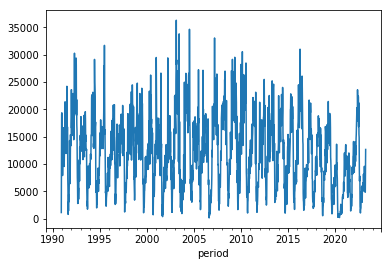

In [16]:
sorted_data['inc'].plot()

Un zoom sur les dernières années montre 
- un minimum au moment du mois de septembre (rentrée scolaire ?)
- l'impact des confinements COVID en 2020.

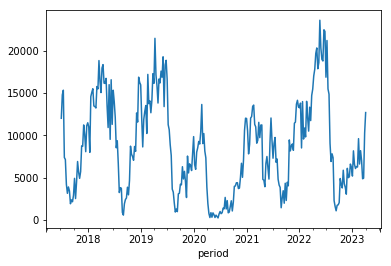

In [17]:
sorted_data['inc'][-300:].plot()

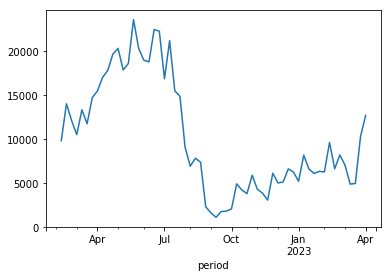

In [18]:
sorted_data['inc'][-60:].plot()

## Etude de l'incidence annuelle

Etant donné que le minimum de l'épidémie se situe en septembre, nous définissons la période de référence entre deux minima de l'incidence, du 1er septembre de l'année $N$ au 1er septembre de l'année $N+1$.

Notre tâche est un peu compliquée par le fait que l'année ne comporte pas un nombre entier de semaines. Nous modifions donc un peu nos périodes de référence: à la place du 1er septembre de chaque année, nous utilisons le premier jour de la semaine qui contient le 1er septembre.

Comme l'incidence de la varicelle est très faible en été, cette modification ne risque pas de fausser nos conclusions.

Encore un petit détail: les données commencent an décembre 1990, ce qui rend la première année incomplète. Nous commençons donc l'analyse en 1991.

In [19]:
first_sept_week = [pd.Period(pd.Timestamp(y, 9, 1), 'W')
                     for y in range(1991,
                                    sorted_data.index[-1].year)]

En partant de cette liste des semaines qui contiennent un 1er septembre, nous obtenons nos intervalles d'environ un an comme les périodes entre deux semaines adjacentes dans cette liste. Nous calculons les sommes des incidences hebdomadaires pour toutes ces périodes.

Nous vérifions également que ces périodes contiennent entre 51 et 52 semaines, pour nous protéger contre des éventuelles erreurs dans notre code.

In [21]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_sept_week[:-1],
                        first_sept_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

Voici les incidences annuelles.

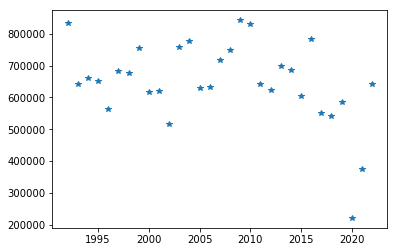

In [22]:
yearly_incidence.plot(style='*')

Une liste triée permet de plus facilement répérer les valeurs les plus élevées (à la fin).

In [23]:
yearly_incidence.sort_values()

2020    221186
2021    376290
2002    516689
2018    542312
2017    551041
1996    564901
2019    584066
2015    604382
2000    617597
2001    619041
2012    624573
2005    628464
2006    632833
2022    641397
2011    642368
1993    643387
1995    652478
1994    661409
1998    677775
1997    683434
2014    685769
2013    698332
2007    717352
2008    749478
1999    756456
2003    758363
2004    777388
2016    782114
2010    829911
1992    832939
2009    842373
dtype: int64

Enfin, un histogramme montre bien que les épidémies fortes, qui touchent environ 10% de la population française, sont assez rares: il y en eu trois au cours des 35 dernières années.

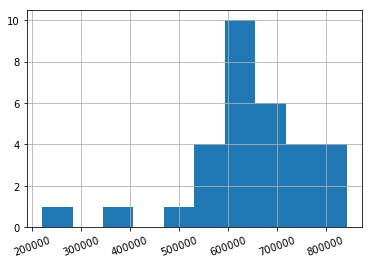

In [24]:
yearly_incidence.hist(xrot=20)